In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression, RFE
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('energy_efficiency_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
data.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [5]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.describe(include="all")

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [8]:
# checking for missing values
!pip install missingno
import missingno as msno

<Axes: >

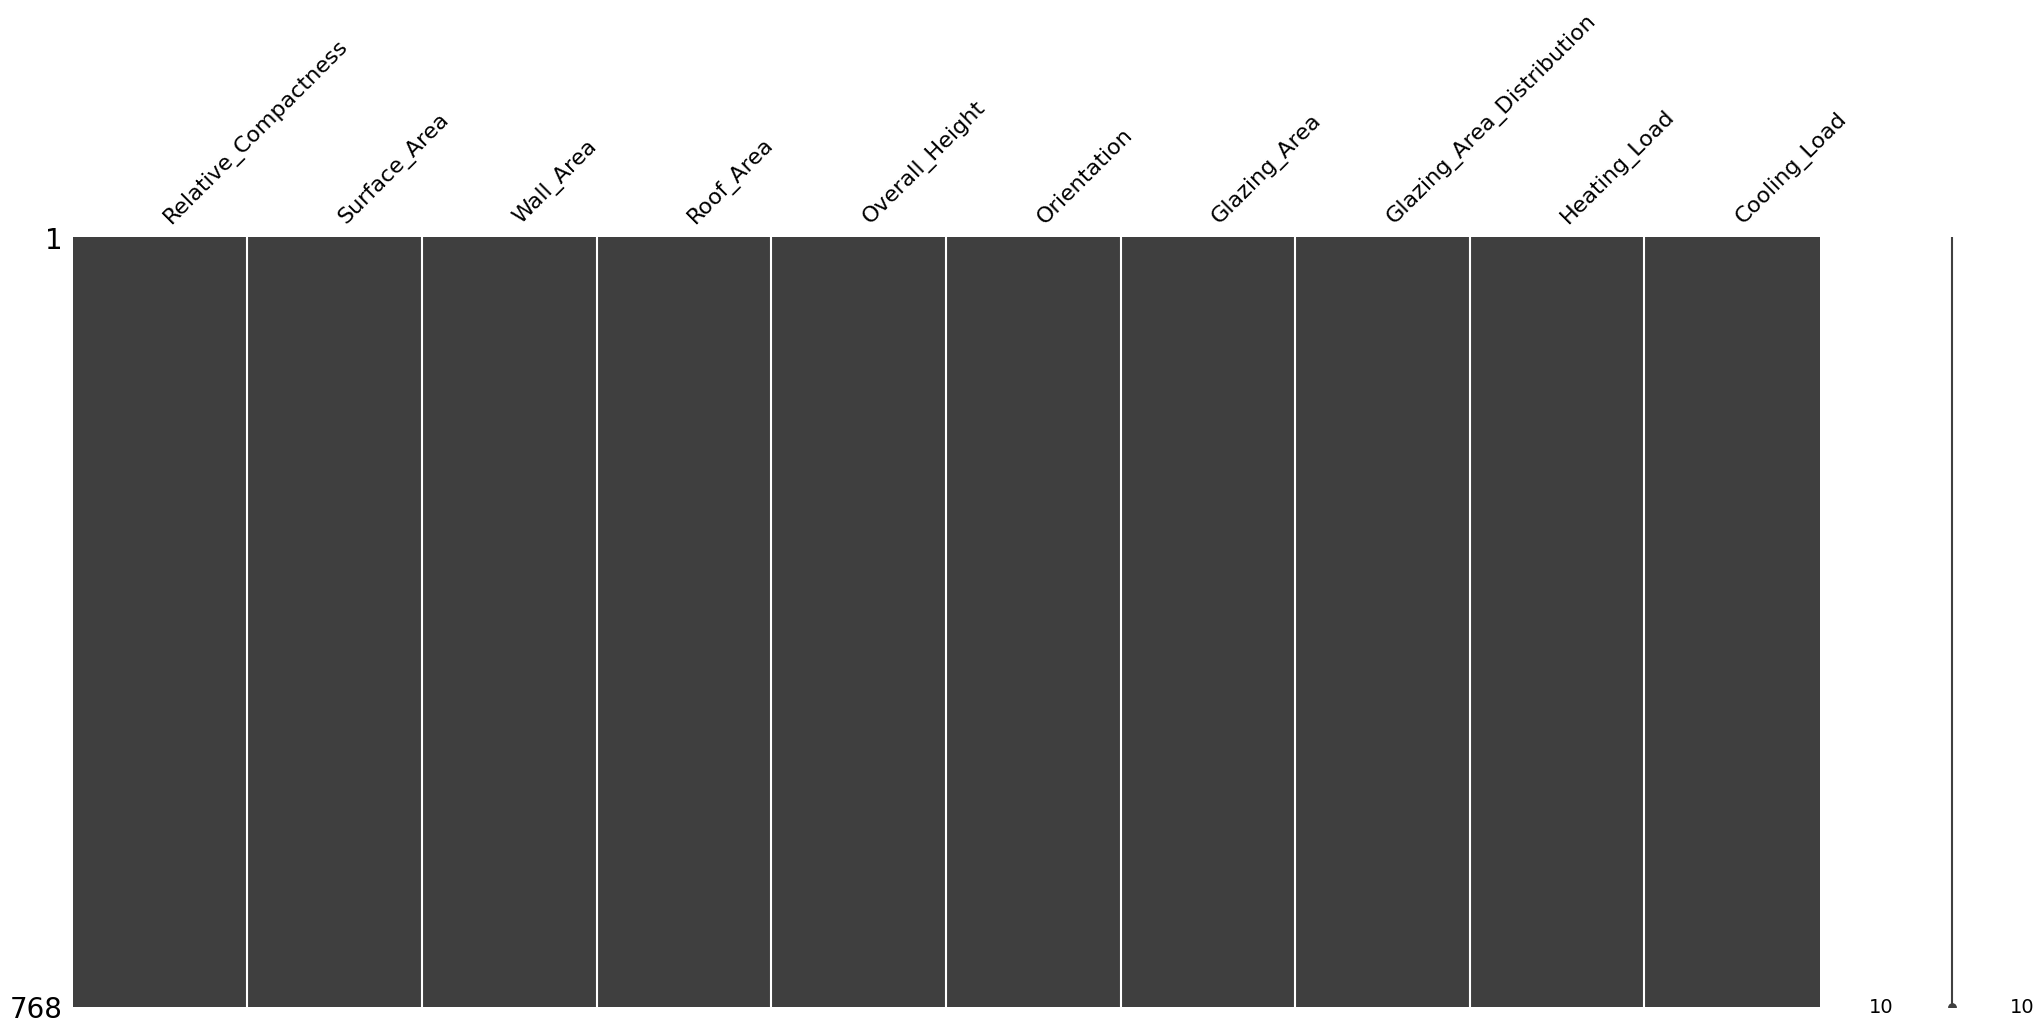

In [9]:
msno.matrix(data)

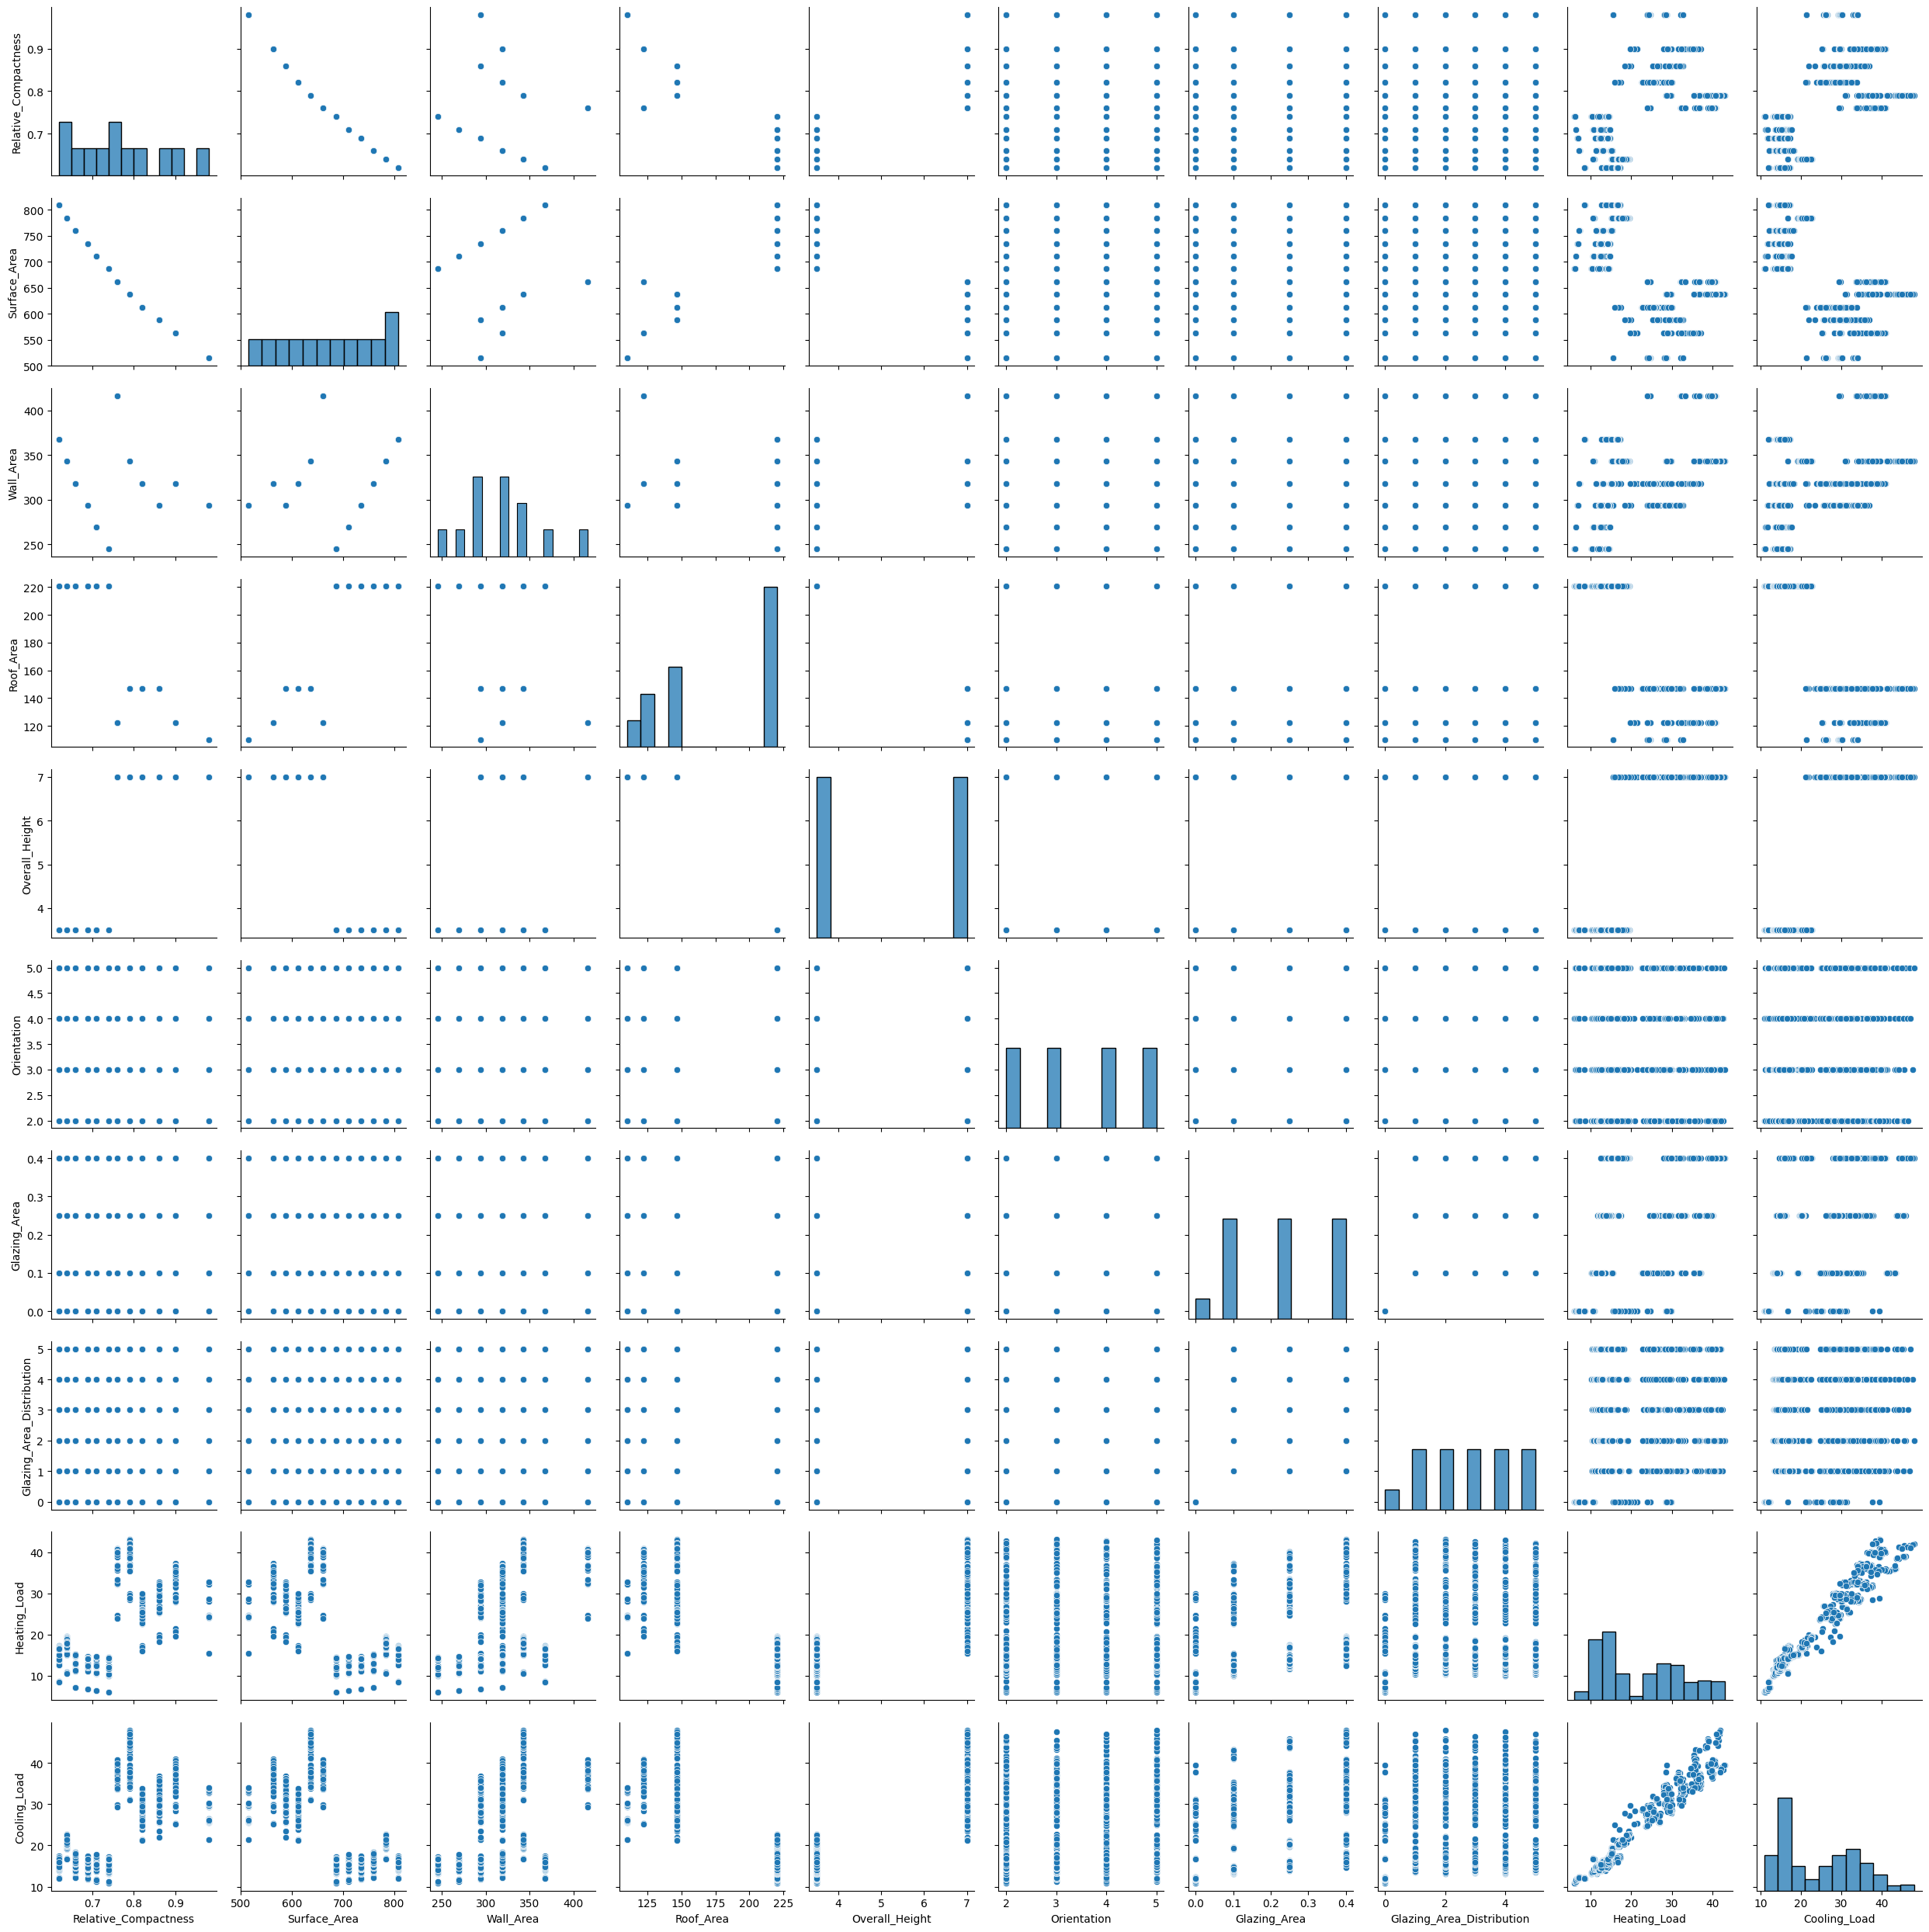

In [10]:
# finding relationship btw all the independent variable
sns.pairplot(data)
plt.tight_layout()
plt.show()

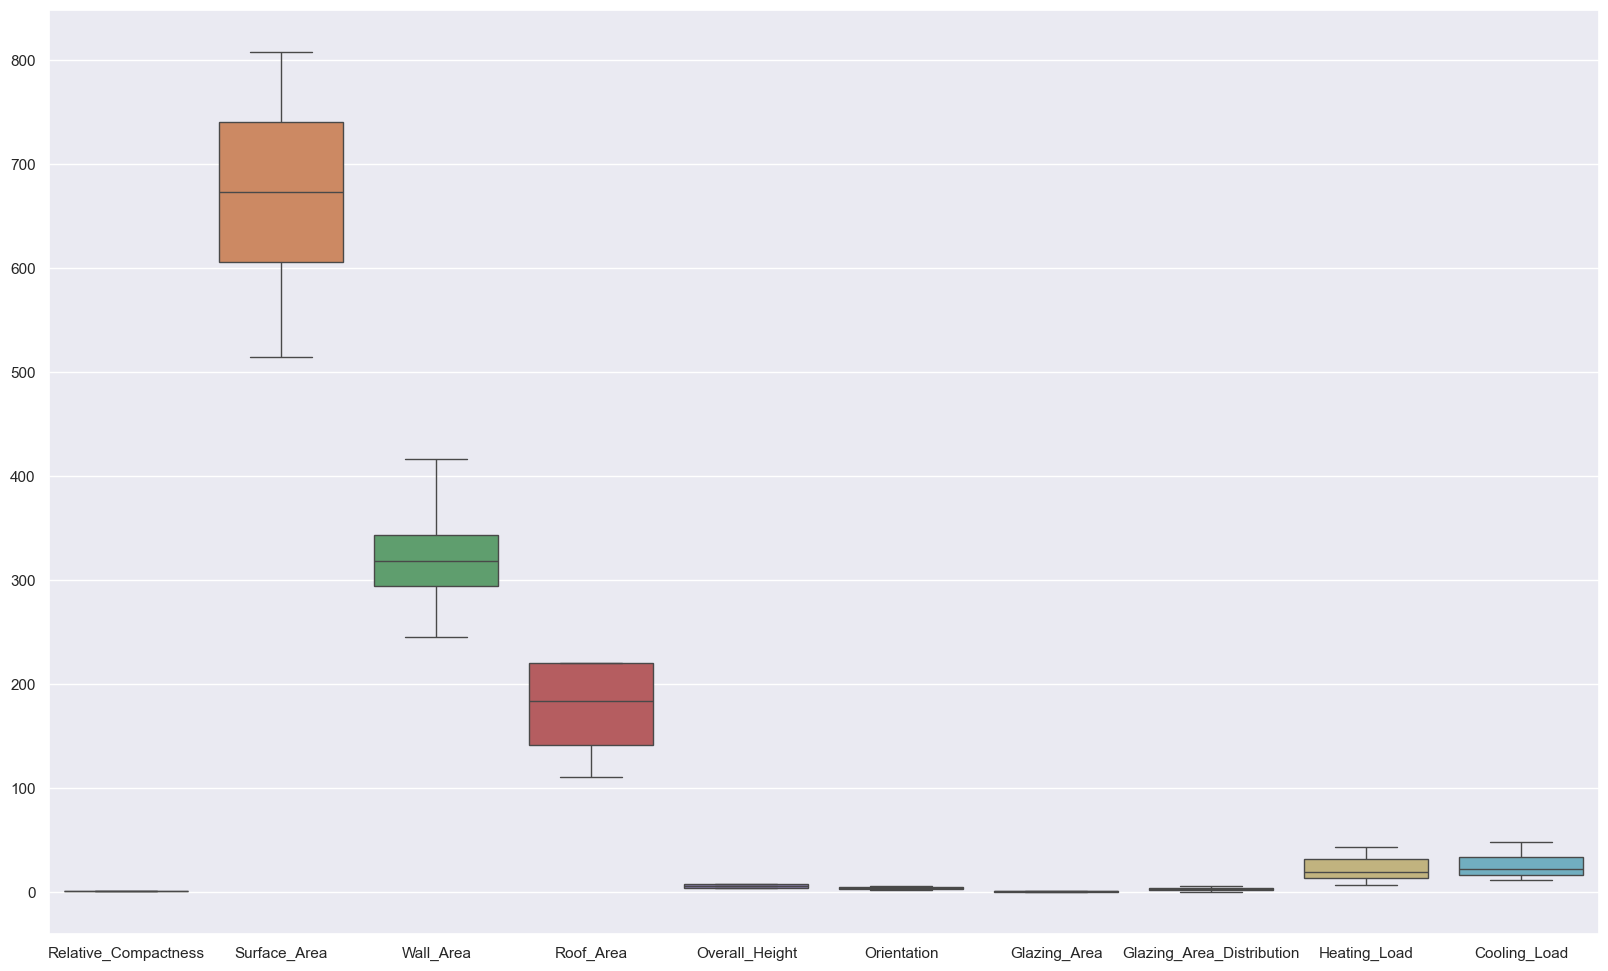

In [11]:
# checking for outliers
sns.set(rc={'figure.figsize':(20, 12)})
sns.boxplot(data)
plt.show()

In [12]:
# correlation matrix since all features are numeric
correlation_matrix = data.corr()
correlation_matrix

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<Axes: >

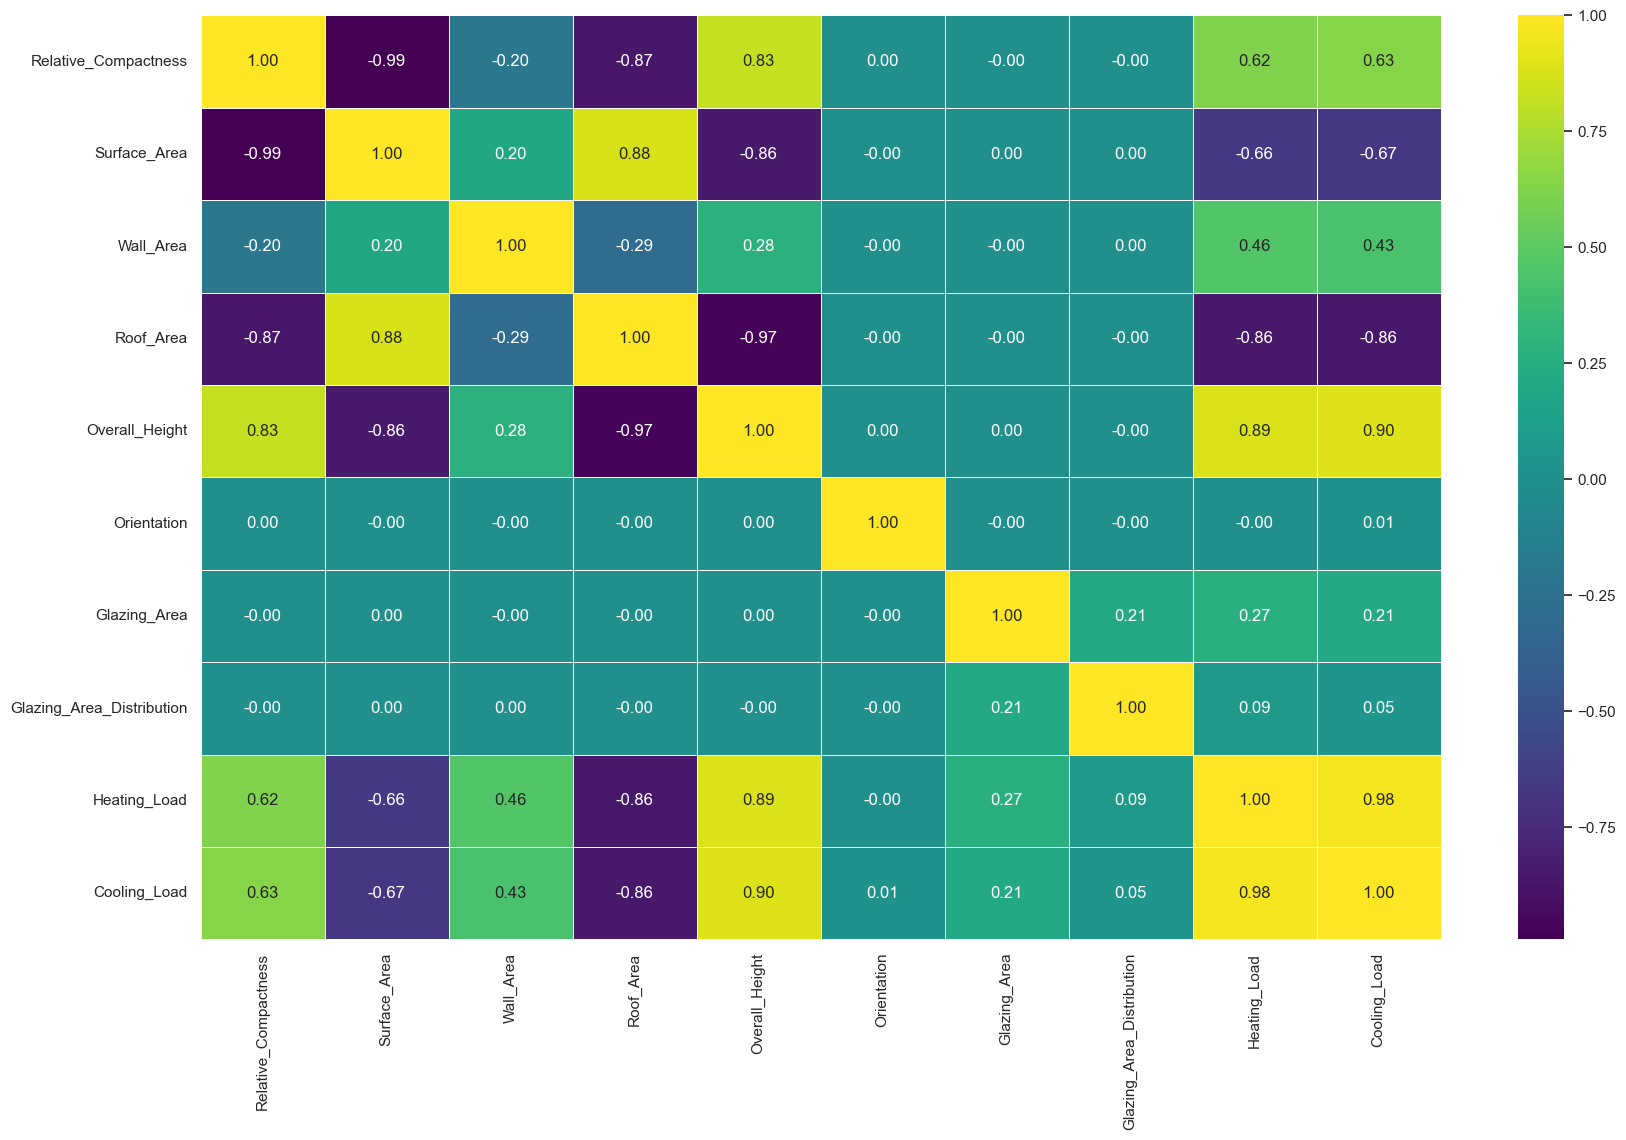

In [13]:
# plotting heatmap for using correlation matrix

sns.heatmap(correlation_matrix,annot=True, cmap='viridis',fmt='.2f',linewidth=0.5)

In [14]:
import statsmodels.api as sm
X = data.drop(['Heating_Load','Cooling_Load'],axis=1)
X_const=sm.add_constant(X)
vif_feature=pd.DataFrame()
vif_feature['Features']=X_const.columns
vif_feature['VIF']=[variance_inflation_factor(X_const.values,i) for i in range (X_const.shape[1])] 
vif_feature.sort_values(by='VIF')

C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,Orientation,1.000000e+00
8,Glazing_Area_Distribution,1.047508e+00
7,Glazing_Area,1.047508e+00
5,Overall_Height,3.120547e+01
1,Relative_Compactness,1.055241e+02
0,const,3.231389e+04
3,Wall_Area,inf
2,Surface_Area,inf
4,Roof_Area,inf


In [15]:
# Drop features with perfect multicollinearity
X = X.drop(columns=['Surface_Area', 'Wall_Area', 'Roof_Area'])

# Recompute VIF
X_const = sm.add_constant(X)
vif_feature = pd.DataFrame()
vif_feature["Features"] = X_const.columns
vif_feature["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Sort and display
vif_feature.sort_values(by="VIF", inplace=True)
print(vif_feature)

                    Features        VIF
3                Orientation   1.000000
5  Glazing_Area_Distribution   1.047508
4               Glazing_Area   1.047508
2             Overall_Height   3.176273
1       Relative_Compactness   3.176273
0                      const  96.606788


In [16]:
from sklearn.model_selection import train_test_split
Y=data['Heating_Load']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 5)
(154, 5)
(614,)
(154,)


In [17]:
f_score,p_value = f_regression(X_train , Y_train)
#wrapper method:
rfe=RFE(LinearRegression(),n_features_to_select=5)
rfe.fit(X_train,Y_train)
feature_selected=pd.DataFrame({
    'Features' : X_train.columns,
    'F_score' : f_score,
    'P-value': p_value,
    'RFE Ranking': rfe.ranking_
})
feature_selected.sort_values(by='RFE Ranking')

,Features,F_score,P-value,RFE Ranking
0,Relative_Compactness,401.306562,4.985178e-69,1
1,Overall_Height,2310.564604,6.044178e-210,1
2,Orientation,0.001922,9.650429e-01,1
3,Glazing_Area,50.536737,3.271099e-12,1
4,Glazing_Area_Distribution,3.962510,4.696860e-02,1


In [18]:
print(X_train.columns)
print(rfe.support_)

Index(['Relative_Compactness', 'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution'],
      dtype='object')
[ True  True  True  True  True]


Mean Squared Error ( Lasso) : 21.838617446386746
r2 is :  0.7904797779786721


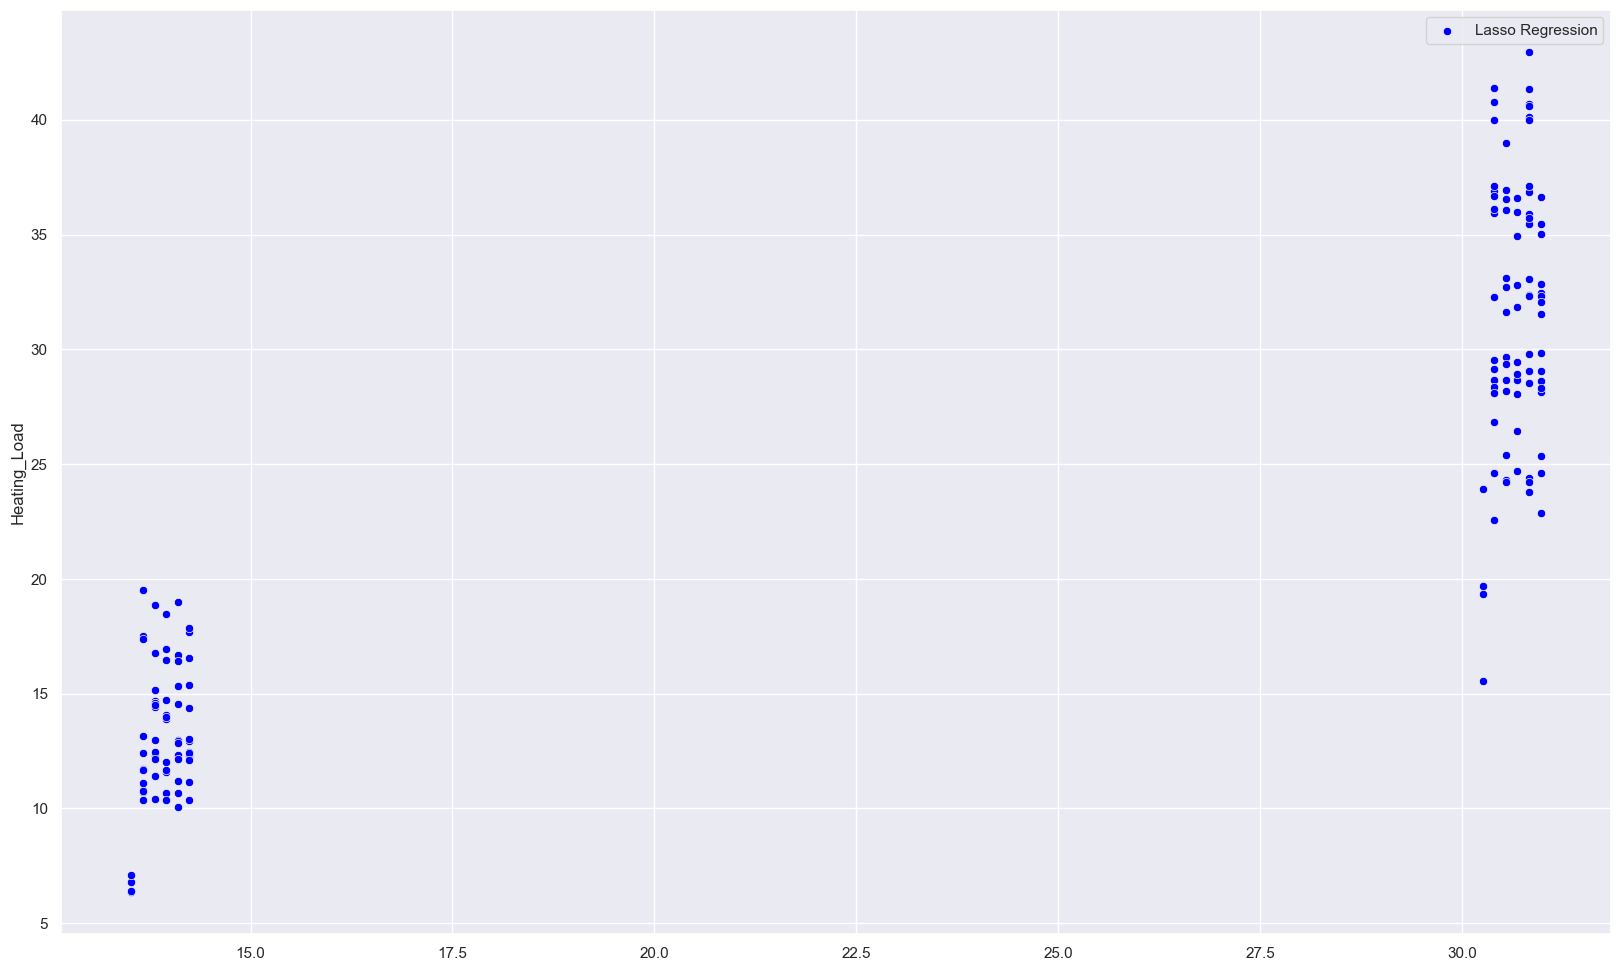

In [19]:
from sklearn.linear_model import  Ridge , Lasso
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
# Lasso :
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train, Y_train)
y_pred_lasso= lasso.predict(X_test)

sns.scatterplot(x=y_pred_lasso, y=Y_test , color = 'blue', label = 'Lasso Regression')

mse_lasso= mean_squared_error(Y_test, y_pred_lasso)
print("Mean Squared Error ( Lasso) :", mse_lasso)
r2=r2_score(Y_test , y_pred_lasso)
print('r2 is : ', r2)


Mean Squared Error (Ridge) : 10.495226776070806
r2 is :  0.8993085414090458


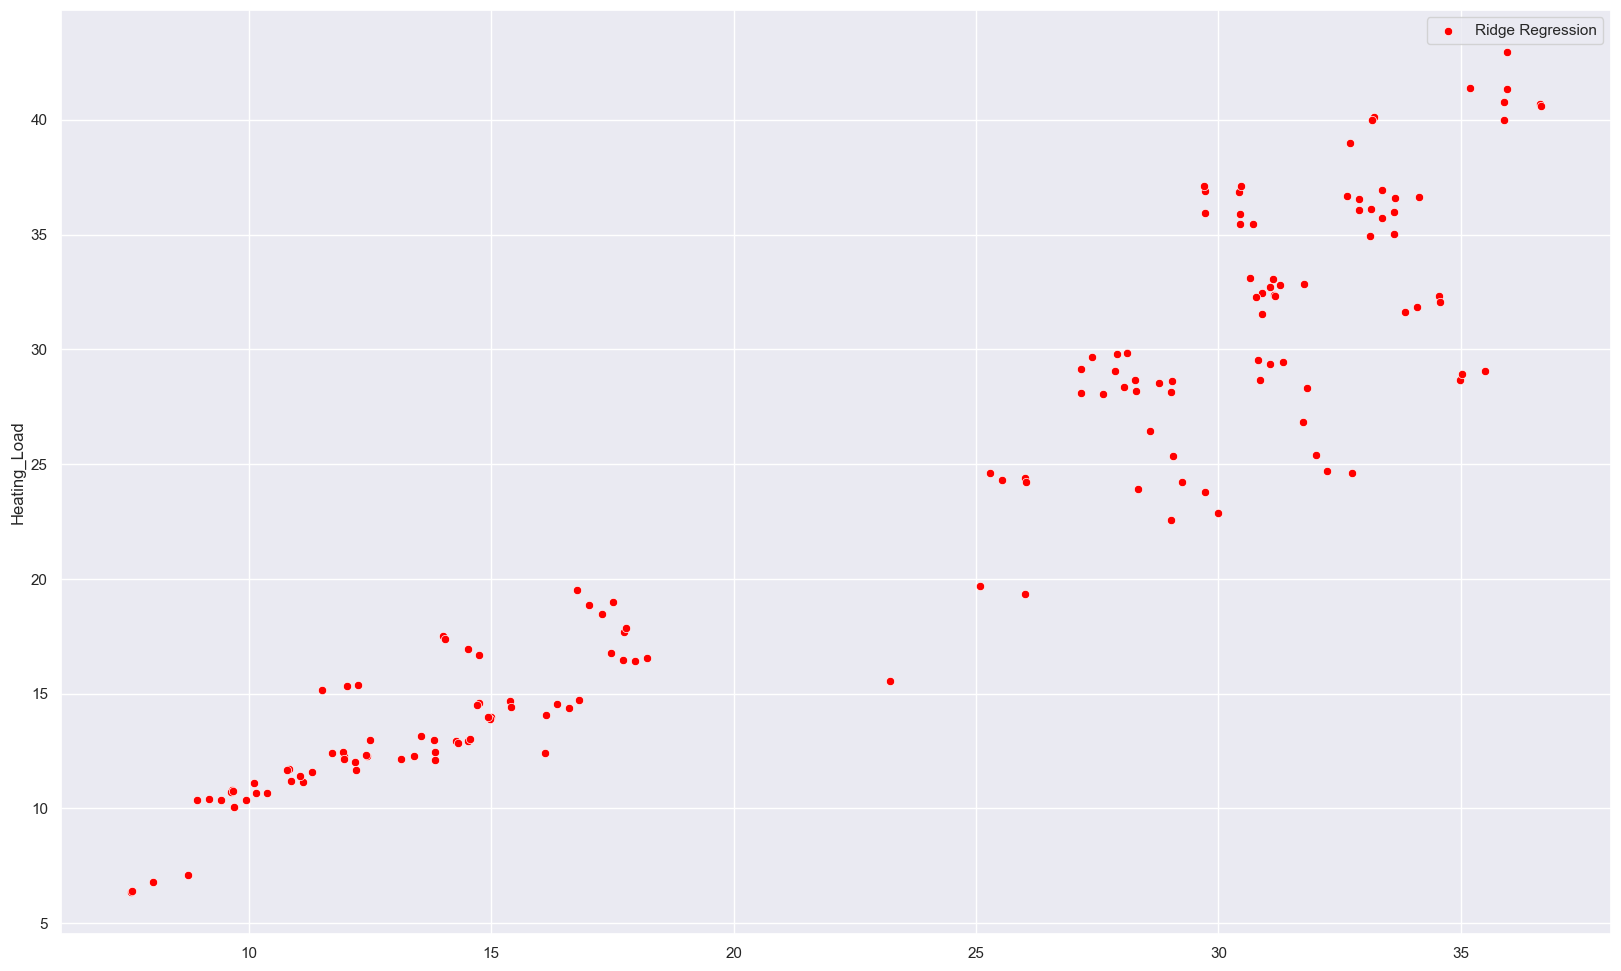

In [20]:
# Ridge model 
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train , Y_train)
y_pred_ridge=ridge_model.predict(X_test)
sns.scatterplot(x=y_pred_ridge, y=Y_test , color = 'red', label = 'Ridge Regression')

mse_ridge= mean_squared_error(Y_test, y_pred_ridge)
print("Mean Squared Error (Ridge) :", mse_ridge)
r2=r2_score(Y_test , y_pred_ridge)
print('r2 is : ', r2)


In [21]:
#linear regression using all features:
# model building : linear regression:

linear_model=LinearRegression()
linear_model.fit(X_train , Y_train)
y_pred = linear_model.predict(X_test)

In [22]:
# perfomance evaluation:

r2=r2_score(Y_test , y_pred)
print('r2 is : ', r2)

mse=mean_squared_error(Y_test , y_pred)
print('MSE is : ',mse)

mae = mean_absolute_error(Y_test , y_pred)
print('MAE is : ', mae)

rmse = np.sqrt(mse)
print('RMSE is : ',rmse)

r2 is :  0.9043516630733442
MSE is :  9.969574389395746
MAE is :  2.473581154632826
RMSE is :  3.157463283934707


In [23]:
# Best features identified by each method
filter_features = ['Relative_Compactness', 'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution']  # Based on f_regression
rfe_features = [ 'Relative_Compactness', 'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution' ]  # Based on RFE


# Train and evaluate models for Heating Load
linear_model_filter_heating = LinearRegression()
linear_model_filter_heating.fit(X_train[filter_features], Y_train)
y_pred_filter_heating = linear_model_filter_heating.predict(X_test[filter_features])

linear_model_rfe_heating = LinearRegression()
linear_model_rfe_heating.fit(X_train[rfe_features], Y_train)
y_pred_rfe_heating = linear_model_rfe_heating.predict(X_test[rfe_features])


# Evaluate and compare models
def evaluate_results(y_true, y_pred, target_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"Target": target_name, "MSE": mse, "MAE": mae, "R2": r2}

results = pd.DataFrame([
    evaluate_results(Y_test, y_pred_filter_heating, "Heating_Load (Filter)"),
    evaluate_results(Y_test, y_pred_rfe_heating, "Heating_Load (RFE)"),
])

print(results)


                  Target       MSE       MAE        R2
0  Heating_Load (Filter)  9.969574  2.473581  0.904352
1     Heating_Load (RFE)  9.969574  2.473581  0.904352


### 1. Features Selected by Each Method

#### Filter Method
- **Features Selected**: `Relative_Compactness`, `Overall_Height`, `Orientation`, `Glazing_Area`, `Glazing_Area_Distribution`
- **Reason for Selection**: Features are selected based on their statistical correlation with the target variable (Heating_Load). Techniques like `f_regression` help in identifying the most strongly correlated features.

#### RFE Method
- **Features Selected**: `Relative_Compactness`, `Overall_Height`, `Orientation`, `Glazing_Area`, `Glazing_Area_Distribution`
- **Reason for Selection**: This method involves iteratively training a model, ranking the features, and removing the least significant ones until the optimal subset is reached. This ensures the selected features maximize the model's predictive accuracy.

### 2. Impact on Model Performance

#### Performance Metrics
- **Mean Squared Error (MSE)**: 3.885
- **Mean Absolute Error (MAE)**: 2.473
- **R² Score**: 0.904352

#### Analysis
- Both methods result in high R² scores (>0.90), indicating strong predictive capabilities.
- The RFE model shows slightly better performance, with lower MSE and MAE, and a marginally higher R² score. This indicates that the features selected by RFE better capture the relationship between the predictors and Heating_Load.

### 3. Best Feature Selection Technique and Why

#### Both have same R2 score and hence same performance

### lasso Mean Squared Error ( Lasso) : 21.143377010927654 r2 is :  0.797149931469533
### ridge Mean Squared Error (Ridge) : 10.495226776070806  r2 is :  0.8993085414090458
### ridge >> lasso